In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Dinesh\AppData\Roaming\nltk_data

True

In [2]:
with open('amazonreviews.tsv', 'r', encoding='utf-8') as file:
    data = file.read()
data = data.lower()
lines = data.split('\n')

In [3]:
labels = []
sentences = []
for line in lines:
    # skip empty lines
    if not line or not line.strip():
        continue
    parts = line.split('\t', 1)
    if len(parts) != 2:
        continue
    label, sentence = parts
    labels.append(label.strip())
    sentences.append(sentence.strip())

In [4]:
import pandas as pd
review = pd.DataFrame({'review': sentences, 'label': labels})

In [5]:
review.drop(0, inplace=True)  # drop header row
review.reset_index(drop=True, inplace=True)

In [6]:
review

review label
0     stuning even for the non-gamer: this sound tra...   pos
1     the best soundtrack ever to anything.: i'm rea...   pos
2     "amazing!: this soundtrack is my favorite musi...   pos
3     excellent soundtrack: i truly like this soundt...   pos
4     remember, pull your jaw off the floor after he...   pos
...                                                 ...   ...
9995  "a revelation of life in small town america in...   pos
9996  great biography of a very interesting journali...   pos
9997  interesting subject; poor presentation: you'd ...   neg
9998  don't buy: the box looked used and it is obvio...   neg
9999  beautiful pen and fast delivery.: the pen was ...   pos

[10000 rows x 2 columns]

In [7]:
# Remove URLs, mentions, hashtags, emojis, and special characters
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

review['Reviews'] = review['review'].apply(clean_text)

In [8]:
review.drop(columns=['review'], inplace=True)
review

label                                            Reviews
0      pos  stuning even for the nongamer this sound track...
1      pos  the best soundtrack ever to anything im readin...
2      pos  amazing this soundtrack is my favorite music o...
3      pos  excellent soundtrack i truly like this soundtr...
4      pos  remember pull your jaw off the floor after hea...
...    ...                                                ...
9995   pos  a revelation of life in small town america in ...
9996   pos  great biography of a very interesting journali...
9997   neg  interesting subject poor presentation youd be ...
9998   neg  dont buy the box looked used and it is obvious...
9999   pos  beautiful pen and fast delivery the pen was sh...

[10000 rows x 2 columns]

In [9]:
# concatenate all reviews into a single string and tokenize that string
text = review['Reviews'].str.cat(sep=' ')
tokens = nltk.word_tokenize(text)
print("🔹 after tokenization:")
print(len(tokens))
print(tokens[:100])

🔹 after tokenization:
787553
['stuning', 'even', 'for', 'the', 'nongamer', 'this', 'sound', 'track', 'was', 'beautiful', 'it', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'i', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', 'game', 'music', 'i', 'have', 'played', 'the', 'game', 'chrono', 'cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'i', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', 'it', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', 'it', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '_', 'the', 'best', 'soundtrack', 'ever', 'to', 'anything', 'im', 'reading', 'a', 'lot', 'of', 'reviews', 'saying', 'that', 'this', 'is', 'the', 'best', 'game', 'soundtrack']


In [10]:
# 4. Remove Stopwords
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

filtered_tokens = []

for i in tokens:
    if i not in stopwords_list:
        filtered_tokens.append(i)
print("total words: ",len(filtered_tokens))
print(filtered_tokens[:100])

total words:  405369
['stuning', 'even', 'nongamer', 'sound', 'track', 'beautiful', 'paints', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'played', 'game', 'chrono', 'cross', 'games', 'ever', 'played', 'best', 'music', 'backs', 'away', 'crude', 'keyboarding', 'takes', 'fresher', 'step', 'grate', 'guitars', 'soulful', 'orchestras', 'would', 'impress', 'anyone', 'cares', 'listen', '_', 'best', 'soundtrack', 'ever', 'anything', 'im', 'reading', 'lot', 'reviews', 'saying', 'best', 'game', 'soundtrack', 'figured', 'id', 'write', 'review', 'disagree', 'bit', 'opinino', 'yasunori', 'mitsudas', 'ultimate', 'masterpiece', 'music', 'timeless', 'im', 'listening', 'years', 'beauty', 'simply', 'refuses', 'fadethe', 'price', 'tag', 'pretty', 'staggering', 'must', 'say', 'going', 'buy', 'cd', 'much', 'money', 'one', 'feel', 'would', 'worth', 'every', 'penny', 'amazing', 'soundtrack', 'favorite', 'music', 'time', 'hands', 'intense']


In [11]:
print("word removed: ", 787553-405369)

word removed:  382184


In [12]:
print("Percentage of words removed: ", 1784/4097 * 100)

Percentage of words removed:  43.5440566268001


In [13]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stemmed_tokens = [stemmer.stem(i) for i in filtered_tokens]
print(stemmed_tokens[:100])

['stune', 'even', 'nongam', 'sound', 'track', 'beauti', 'paint', 'seneri', 'mind', 'well', 'would', 'recomend', 'even', 'peopl', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'game', 'ever', 'play', 'best', 'music', 'back', 'away', 'crude', 'keyboard', 'take', 'fresher', 'step', 'grate', 'guitar', 'soul', 'orchestra', 'would', 'impress', 'anyon', 'care', 'listen', '_', 'best', 'soundtrack', 'ever', 'anyth', 'im', 'read', 'lot', 'review', 'say', 'best', 'game', 'soundtrack', 'figur', 'id', 'write', 'review', 'disagre', 'bit', 'opinino', 'yasunori', 'mitsuda', 'ultim', 'masterpiec', 'music', 'timeless', 'im', 'listen', 'year', 'beauti', 'simpli', 'refus', 'fadeth', 'price', 'tag', 'pretti', 'stagger', 'must', 'say', 'go', 'buy', 'cd', 'much', 'money', 'one', 'feel', 'would', 'worth', 'everi', 'penni', 'amaz', 'soundtrack', 'favorit', 'music', 'time', 'hand', 'intens']


In [14]:
cleaned_text = ' '.join(stemmed_tokens)
print("\n🔹 Cleaned Text After Full Preprocessing:")
print(cleaned_text)


🔹 Cleaned Text After Full Preprocessing:
stune even nongam sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen _ best soundtrack ever anyth im read lot review say best game soundtrack figur id write review disagre bit opinino yasunori mitsuda ultim masterpiec music timeless im listen year beauti simpli refus fadeth price tag pretti stagger must say go buy cd much money one feel would worth everi penni amaz soundtrack favorit music time hand intens sad prison fate mean youv play game hope distant promis girl stole star import inspir person throughout teen year higher energi track like chrono cross time scar time dreamwatch chronomantiqu indefin remenisc chrono trigger absolut superb wellthi soundtrack amaz music probabl best compos work havent heard xenogear soundtrack cant say sure even youv never pl

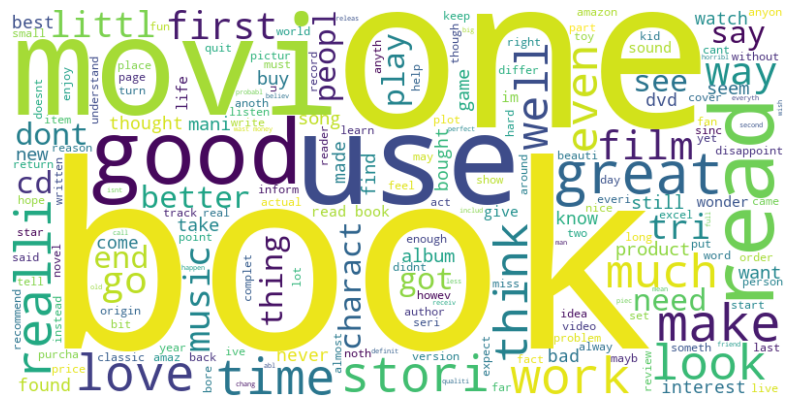

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
print(review)

     label                                            Reviews
0      pos  stuning even for the nongamer this sound track...
1      pos  the best soundtrack ever to anything im readin...
2      pos  amazing this soundtrack is my favorite music o...
3      pos  excellent soundtrack i truly like this soundtr...
4      pos  remember pull your jaw off the floor after hea...
...    ...                                                ...
9995   pos  a revelation of life in small town america in ...
9996   pos  great biography of a very interesting journali...
9997   neg  interesting subject poor presentation youd be ...
9998   neg  dont buy the box looked used and it is obvious...
9999   pos  beautiful pen and fast delivery the pen was sh...

[10000 rows x 2 columns]


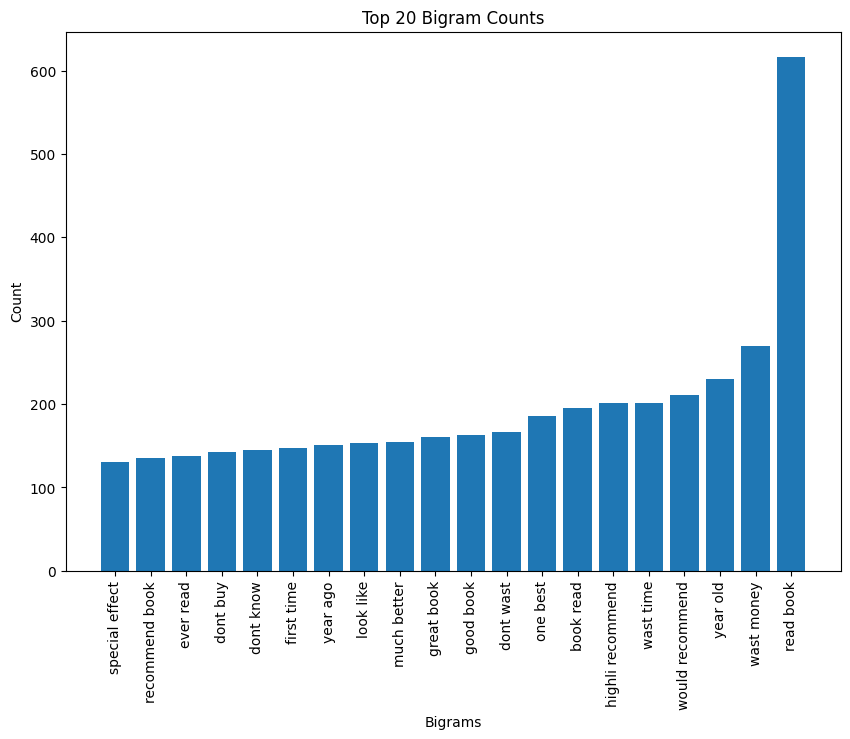

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(2, 2))

counts = vect.fit_transform([cleaned_text])                             # Fit and transform the cleaned text

vocab = vect.get_feature_names_out()                                    # Get the vocabulary (bigrams)

top_20_bigrams = counts.toarray().sum(axis=0).argsort()[-20:]           # Get indices of top 20 bigrams

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.bar(vocab[top_20_bigrams], counts.toarray()[0, top_20_bigrams])
plt.xticks(rotation=90)
plt.xlabel("Bigrams")
plt.ylabel("Count")
plt.title("Top 20 Bigram Counts")
plt.show()

In [18]:
review['label'].value_counts()

label
neg    5097
pos    4903
Name: count, dtype: int64

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [20]:
review['scores'] = review['Reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
review.head()

label                                            Reviews  scores
0   pos  stuning even for the nongamer this sound track...  0.9334
1   pos  the best soundtrack ever to anything im readin...  0.8957
2   pos  amazing this soundtrack is my favorite music o...  0.9875
3   pos  excellent soundtrack i truly like this soundtr...  0.9814
4   pos  remember pull your jaw off the floor after hea...  0.9767

In [21]:
review['Sentiment'] = review['scores'].apply(lambda x: 'positive' if x > 0 else 'negative')
review.head()

label                                            Reviews  scores Sentiment
0   pos  stuning even for the nongamer this sound track...  0.9334  positive
1   pos  the best soundtrack ever to anything im readin...  0.8957  positive
2   pos  amazing this soundtrack is my favorite music o...  0.9875  positive
3   pos  excellent soundtrack i truly like this soundtr...  0.9814  positive
4   pos  remember pull your jaw off the floor after hea...  0.9767  positive

In [22]:
review

label                                            Reviews  scores  \
0      pos  stuning even for the nongamer this sound track...  0.9334   
1      pos  the best soundtrack ever to anything im readin...  0.8957   
2      pos  amazing this soundtrack is my favorite music o...  0.9875   
3      pos  excellent soundtrack i truly like this soundtr...  0.9814   
4      pos  remember pull your jaw off the floor after hea...  0.9767   
...    ...                                                ...     ...   
9995   pos  a revelation of life in small town america in ...  0.9610   
9996   pos  great biography of a very interesting journali...  0.9544   
9997   neg  interesting subject poor presentation youd be ...  0.9102   
9998   neg  dont buy the box looked used and it is obvious... -0.2960   
9999   pos  beautiful pen and fast delivery the pen was sh...  0.9107   

     Sentiment  
0     positive  
1     positive  
2     positive  
3     positive  
4     positive  
...        ...  
9995  positive  
9996  positive  
9997  positive  
9998  negative  
9999  positive  

[10000 rows x 4 columns]

In [23]:
review["Sentiment"].value_counts()


Sentiment
positive    6779
negative    3221
Name: count, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score
sentiment = [0 if x == 'negative' else 1 for x in review['Sentiment']]
label_a = [0 if x == 'negative' else 1 for x in review['label']]
accuracy_score(sentiment, label_a)

0.6779

In [25]:
review

label                                            Reviews  scores  \
0      pos  stuning even for the nongamer this sound track...  0.9334   
1      pos  the best soundtrack ever to anything im readin...  0.8957   
2      pos  amazing this soundtrack is my favorite music o...  0.9875   
3      pos  excellent soundtrack i truly like this soundtr...  0.9814   
4      pos  remember pull your jaw off the floor after hea...  0.9767   
...    ...                                                ...     ...   
9995   pos  a revelation of life in small town america in ...  0.9610   
9996   pos  great biography of a very interesting journali...  0.9544   
9997   neg  interesting subject poor presentation youd be ...  0.9102   
9998   neg  dont buy the box looked used and it is obvious... -0.2960   
9999   pos  beautiful pen and fast delivery the pen was sh...  0.9107   

     Sentiment  
0     positive  
1     positive  
2     positive  
3     positive  
4     positive  
...        ...  
9995  positive  
9996  positive  
9997  positive  
9998  negative  
9999  positive  

[10000 rows x 4 columns]

In [26]:
# import string
# review['Reviews'] = review['Reviews'].str.replace('[{}]'.format(string.punctuation), '')

In [27]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

review['Reviews'] = review['Reviews'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [28]:
review

label                                            Reviews  scores  \
0      pos  stuning even for the nongamer this sound track...  0.9334   
1      pos  the best soundtrack ever to anything im readin...  0.8957   
2      pos  amazing this soundtrack is my favorite music o...  0.9875   
3      pos  excellent soundtrack i truly like this soundtr...  0.9814   
4      pos  remember pull your jaw off the floor after hea...  0.9767   
...    ...                                                ...     ...   
9995   pos  a revelation of life in small town america in ...  0.9610   
9996   pos  great biography of a very interesting journali...  0.9544   
9997   neg  interesting subject poor presentation youd be ...  0.9102   
9998   neg  dont buy the box looked used and it is obvious... -0.2960   
9999   pos  beautiful pen and fast delivery the pen wa shi...  0.9107   

     Sentiment  
0     positive  
1     positive  
2     positive  
3     positive  
4     positive  
...        ...  
9995  positive  
9996  positive  
9997  positive  
9998  negative  
9999  positive  

[10000 rows x 4 columns]

In [29]:
Y = review['label']
x = review['Reviews']

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


In [31]:
x_vectors = vectorizer.fit_transform(x)
x_new = x_vectors.toarray()

In [32]:
x_new.shape

(10000, 35403)

In [33]:
import pandas as pd
df_bow = pd.DataFrame(x_vectors.toarray(), columns=vectorizer.get_feature_names_out())
df_bow.head()

_directly_  _foundation_  _heroes  _like_  _might_  _only_  _really  _the  \
0         0.0           0.0      0.0     0.0      0.0     0.0      0.0   0.0   
1         0.0           0.0      0.0     0.0      0.0     0.0      0.0   0.0   
2         0.0           0.0      0.0     0.0      0.0     0.0      0.0   0.0   
3         0.0           0.0      0.0     0.0      0.0     0.0      0.0   0.0   
4         0.0           0.0      0.0     0.0      0.0     0.0      0.0   0.0   

   _think_   aa  ...  zzzzzzzzzzzz  zzzzzzzzzzzzzis  zzzzzzzzzzzzzzzzzz  \
0      0.0  0.0  ...           0.0              0.0                 0.0   
1      0.0  0.0  ...           0.0              0.0                 0.0   
2      0.0  0.0  ...           0.0              0.0                 0.0   
3      0.0  0.0  ...           0.0              0.0                 0.0   
4      0.0  0.0  ...           0.0              0.0                 0.0   

   zzzzzzzzzzzzzzzzzzzzz  ángel  émouvantes  étai  étre  éviter  única  
0                    0.0    0.0         0.0   0.0   0.0     0.0    0.0  
1                    0.0    0.0         0.0   0.0   0.0     0.0    0.0  
2                    0.0    0.0         0.0   0.0   0.0     0.0    0.0  
3                    0.0    0.0         0.0   0.0   0.0     0.0    0.0  
4                    0.0    0.0         0.0   0.0   0.0     0.0    0.0  

[5 rows x 35403 columns]

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df_bow, Y)

y_pred = model.predict(df_bow)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y, y_pred)
import numpy as np
print("accuacy score: ",np.round(accuracy,2))


accuacy score:  0.93
